In [13]:
import pydotplus
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import tree
import collections
from IPython.display import Image as PImage


jugadores = pd.read_csv("datos.csv")
jugadores.shape
jugadores.head()



,id,clima,temperatura,humedad,viento,palos,jugar
0,1,lluvioso,frio,normal,no,buenos,si
1,2,lluvioso,frio,normal,si,buenos,no
2,3,nublado,caliente,alta,no,buenos,si
3,4,soleado,templado,alta,no,malos,no
4,5,lluvioso,frio,normal,no,buenos,si


In [27]:
clima={'lluvioso':1,'nublado':2, 'soleado':3}
temperatura={'frio':1, 'caliente':2, 'templado':3}
humedad={'normal':1, 'alta':2}
viento={'no':1,'si':2}
palos={'malos':1, 'buenos':2}

X = [[clima['lluvioso'],temperatura['frio'],humedad['normal'],viento['no'],palos['buenos']],
     [clima['lluvioso'],temperatura['frio'],humedad['normal'],viento['si'],palos['buenos']],
     [clima['nublado'],temperatura['caliente'],humedad['alta'],viento['no'],palos['buenos']],
     [clima['soleado'],temperatura['templado'],humedad['alta'],viento['no'],palos['malos']],
     [clima['lluvioso'],temperatura['frio'],humedad['normal'],viento['no'],palos['buenos']],
     [clima['soleado'],temperatura['frio'],humedad['normal'],viento['no'],palos['buenos']],
     [clima['lluvioso'],temperatura['frio'],humedad['normal'],viento['no'],palos['malos']],
     [clima['soleado'],temperatura['caliente'],humedad['normal'],viento['no'],palos['buenos']],
     [clima['nublado'],temperatura['templado'],humedad['alta'],viento['si'],palos['malos']],
     [clima['soleado'],temperatura['templado'],humedad['alta'],viento['si'],palos['buenos']]]

Y = ['si', 'no', 'si', 'no', 'si','si','si','si','si','no'] 

data_feature_names=['clima','temperatura','humedad','viento','palos']


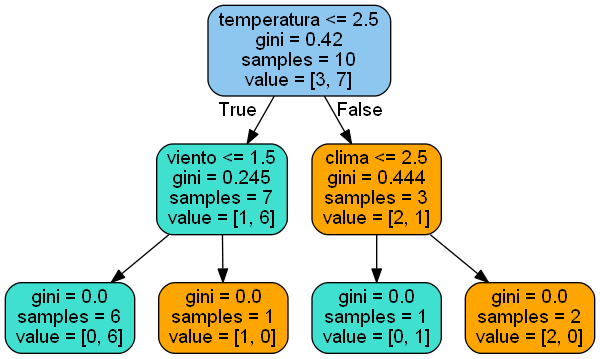

In [41]:
# Training
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,Y)

# Visualize data
dot_data = tree.export_graphviz(clf,
                                feature_names=data_feature_names,
                                out_file=None,
                                filled=True,
                                rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])
graph.write_png('tree.png')
PImage('tree.png')